#컨볼루션 신경망

##6.1 특징 추출

**컨볼루션 연산**은 각 픽셀을 본래 픽셀과 그 주변 픽셀의 조합으로 대체하는 동작이다.

컨볼루션 연산은 우리말로 '합성곱'이라고 한다. 원본 이미지의 각 픽셀을 포함한 주변 픽셀과 필터의 모든 픽셀은 각각 곱 연산을 하고, 그 결과를 모두 합해서 새로운 이미지를 넣어주기 때문에 합성곱이라 불린다.

딥러닝 기반의 컨볼루션 연산은 네트워크가 특징을 추출하는 필터를 자동으로 생성한다. 학습을 계속하면 네트워크를 구성하는 각 뉴런들은 입력한 데이터에 대해 특정 패턴을 잘 추출할 수 있도록 적응하게 된다.

##6.2 주요 레이어 정리

**Dense 레이어**는 신경망에서 가장 기본되는 레이어로, 각 뉴런이 서로 완전히 연결되기 때문에 완전 연결 레이어라고도 불린다.

**Flatten 레이어**는 다차원의 이미지를 1차원으로 평평하게 바꿔주는 단순한 레이어이다.

분류를 위한 컨볼루션 신경망은 특징 추출기와 분류기가 합쳐져 있는 형태이다. 이 가운데 추출기의 역할을 하는 것은 **풀링 레이어**이며 Dense 레이어는 분류기 역할을 한다.


### 컨볼루션 레이어

    conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3), strides=(2,2), padding='valid', filters=16)

Conv2D 레이어를 생성할 때의 주요 인수는 **kernel_size**, **strides**, **padding**, **filters**의 네가지이다.

**kernel_size**는 필터 행렬의 크기이다. 

**strides**는 필터가 계산 과정에서 한 스텝마다 이동하는 크기이다. 기본값은 (1,1)이다. 

**padding**은 컨볼루션 연산 전에 입력 이미지 주변에 빈 값을 넣ㅇ르지 지정하는 옵션. 'valid'는  빈 값을 넣는 것이 아니기 대문에 출력 값이 작아지고, 'same'은 빈 값을 넣어서 출력값의 크기가 유지된다.

**filters**는 필터의 개수이다. 필터의 개수는 얼마나 많은 특징을 추출할 수 있는지 결정하기 때문에 많을 수록 좋지만, 너무 많을 경우 학습 속도가 느려질 수 있고 과적합이 발생할 수 있다.

### 풀링 레이어

이미지의 크기를 줄이면서 중요한 정보만 남기기 위해 서브샘플링 이라는 기법을 사용한다.

이때 사용되는 것이 풀링 레이어이다.

    pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))

두 개의 주요 인수 중 pool_size는 한번에 Max연산을 수행할 범위이다. 
strides는 Conv2D 레이어에서 나온 것과 동일하게 이동하는 스텝의 크기.

풀링레이어에는 가중치가 존재하지 않기 때문에 학습되지 않으며, 네트워크 구조에 따라 생략되기도 한다.

### 드롭아웃 레이어

**드롭아웃 레이어**는 네트워크의 과적합을 막기 위한 레이어이다. 학습 과정에서 무작위로 뉴런의 부분집합을 제거하는 것이다. 학습과정에서만 드롭아웃을 진행하고, 테스트에서는 모두 사용한다.

    pool2 = tf.keras.layers.Dropout(rate=0.3)

주요 인수는 rate로 제외할 뉴런의 비율을 나타낸다. 드롭아웃 레이어도 가중치가 없기 때문에 학습되지 않는다.

## 6.2 Fashion MNIST 데이터 세트 적용

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()    

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
#reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

#reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


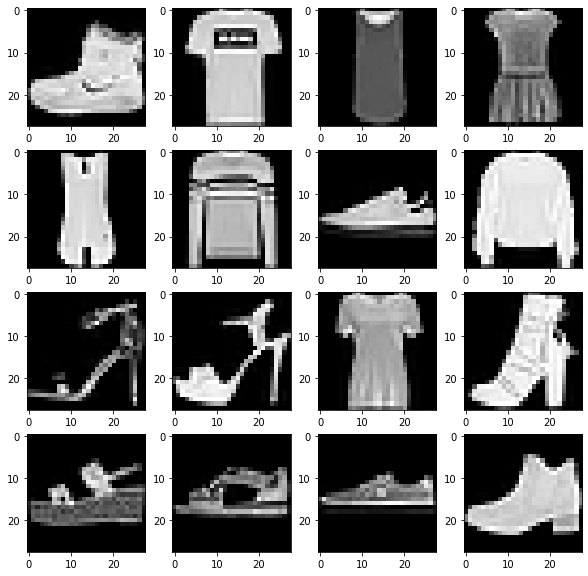

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [3]:
import matplotlib.pyplot as plt

# 전체 그래프의 크기를 sidth = 10, height = 10으로 지정한다.
plt.figure(figsize=(10,10))
for c in range(16):
    # 4행 4열로 지정한 그리드에서 c+1번째 칸에 그래프를 그린다. 1~16번째 칸을 채우게 된다.
    plt.subplot(4,4,c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray') #그래프를 그리기 위해서 데이터가 2차원이어야하기 때문에 plt.imshow를 통해 3차원 데이터를 2차원으로 변환한다.

plt.show()

# 훈련 데이터의 첫번쨰 ~ 16번째 까지의 라벨을 프린트한다.
print(train_Y[:16])

In [4]:
#풀링 레이어 없이 컨볼루션 레이어만 사용하여 모델 정의

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16), #input_shape=(높이, 너비, 채널수)
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

Epoch 1/25
1407/1407 [==============================] - 14s 5ms/step - loss: 0.6103 - accuracy: 0.7916 - val_loss: 0.4185 - val_accuracy: 0.8474
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3376 - accuracy: 0.8774 - val_loss: 0.3700 - val_accuracy: 0.8635
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2798 - accuracy: 0.8961 - val_loss: 0.3619 - val_accuracy: 0.8740
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2356 - accuracy: 0.9137 - val_loss: 0.4113 - val_accuracy: 0.8705
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1959 - accuracy: 0.9290 - val_loss: 0.4610 - val_accuracy: 0.8616
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1757 - accuracy: 0.9355 - val_loss: 0.4619 - val_accuracy: 0.8677
Epoch 7/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1516 - accuracy: 0.9441 - val_loss: 0.4925 - val_accuracy

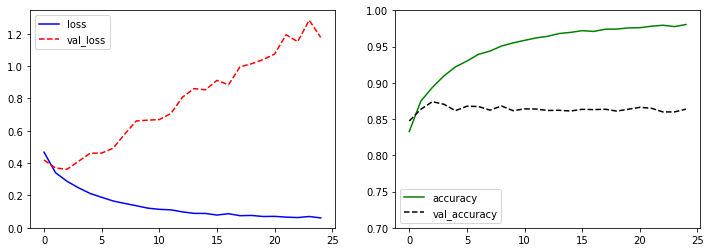

[1.2344579696655273, 0.8562999963760376]

In [5]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.ylim(0.7,1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [6]:
#풀링, 드롭아웃 모두 추가

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
                             tf.keras.layers.MaxPool2D(strides=(2,2)),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
                             tf.keras.layers.MaxPool2D(strides=(2,2)),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.3),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

이전에 400만에 가까운 파라미터 개수에 비해 24ㅁ나 정도로 줄어들었다. 이는 풀링 레이어가 이미지의 크기를 줄여주고 있기 때문에 Flatten 레이어에 들어온 파라미터 수가 줄어들었기 때문이다. 두 모델에서 가장 많은 파라미터가 있는 레이어는 Flatten 레이어 다음의 첫번째 Dense 레이어이기 때문에 이 레이어에 넘어오는 파라미터수가 적을 수록 전체 파라미터 수가 적어지는 것이다.

Dense 레이어 사이에 드롭아웃 레이어도 사용됐다. 풀링 레이어와 드롭아웃 레이어는 모두 과적합을 줄이는데 기여한다. 

Epoch 1/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.7108 - accuracy: 0.7470 - val_loss: 0.3731 - val_accuracy: 0.8621
Epoch 2/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3737 - accuracy: 0.8652 - val_loss: 0.3238 - val_accuracy: 0.8817
Epoch 3/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3170 - accuracy: 0.8848 - val_loss: 0.3177 - val_accuracy: 0.8865
Epoch 4/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2889 - accuracy: 0.8938 - val_loss: 0.2982 - val_accuracy: 0.8939
Epoch 5/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2671 - accuracy: 0.9018 - val_loss: 0.3030 - val_accuracy: 0.8903
Epoch 6/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2486 - accuracy: 0.9079 - val_loss: 0.2956 - val_accuracy: 0.8967
Epoch 7/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2268 - accuracy: 0.9174 - val_loss: 0.3151 - val_accuracy:

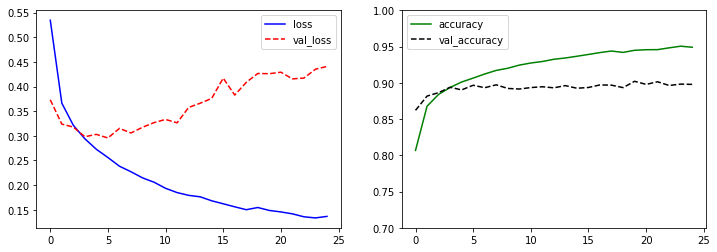

[0.4415724575519562, 0.9007999897003174]

In [7]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

## 6.4 퍼포먼스높이기

컨볼루션 신경망에서 퍼포먼스를 높이는 방법은 **더 많은 레이어 쌓기**와 **이미지 보강**기법이 있다.

### 더 많은 레이어 쌓기


In [8]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=256, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=10, activation='softmax')

])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)        

위 모델에서 컨볼루션 레이어 2개를 겹치고 풀링 레이어 1개를 사용하는 패턴을 2차례 반복했다. 그리고 풀링 레이어의 다음에 드롭아웃 레이어를 위치시켜 과적합을 방지했고, Flatten 레이어 다음에 이어지는 3개의 Dense 레이어 사이에도 드롭아웃 레이어를 배치했다. 컨볼로션 레이어와 Dense 레이어의 개수만 세면 VGG-7정도 된다.

Epoch 1/25
1407/1407 [==============================] - 11s 7ms/step - loss: 0.8605 - accuracy: 0.6828 - val_loss: 0.3357 - val_accuracy: 0.8728
Epoch 2/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3905 - accuracy: 0.8576 - val_loss: 0.2931 - val_accuracy: 0.8893
Epoch 3/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3323 - accuracy: 0.8813 - val_loss: 0.2527 - val_accuracy: 0.9038
Epoch 4/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3018 - accuracy: 0.8915 - val_loss: 0.2631 - val_accuracy: 0.9010
Epoch 5/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2831 - accuracy: 0.8988 - val_loss: 0.2260 - val_accuracy: 0.9149
Epoch 6/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2824 - accuracy: 0.8960 - val_loss: 0.2424 - val_accuracy: 0.9119
Epoch 7/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2760 - accuracy: 0.9022 - val_loss: 0.2277 - val_ac

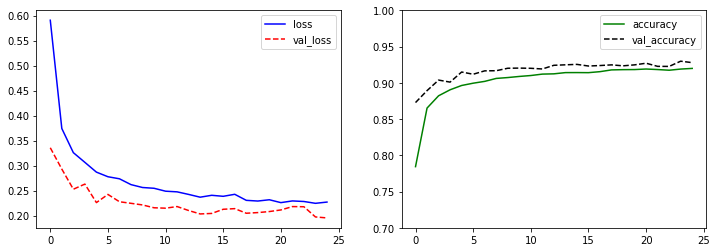

[0.21499313414096832, 0.9218999743461609]

In [9]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

### 이미지 보강



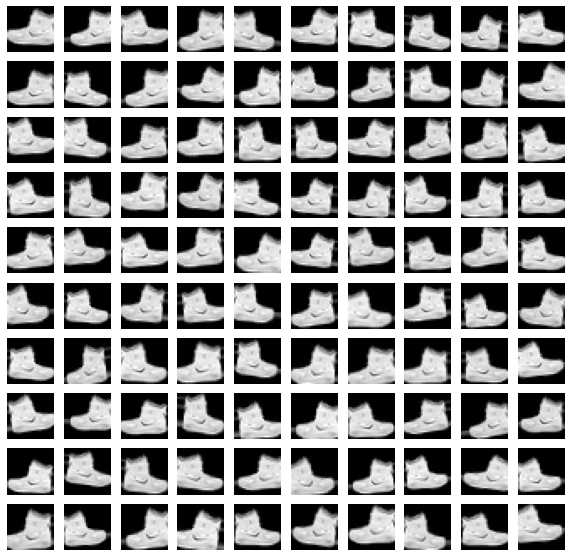

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range=10, zoom_range=0.10, shear_range=0.5,
    width_shift_range=0.10, height_shift_range=0.10, horizontal_flip=True, vertical_flip=False
)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28), 100).reshape(-1, 28, 28,1),
                                   np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

#새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for c in range(100):
    plt.subplot(10, 10, c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')

plt.show()

ImageDataGenerator의 주요 인수들은 rotation_range, zoom_range, shear_range 등이다.

flow() 함수는 실제로 보강된 이미지를 생성한다. 이 함수는 Iterator 라는 객체를 만드는데, 이 객체에서는 값을 순차적으로 꺼낼 수 있다.

값을 꺼내는 방법은 next()함수를 사용하는 것이다.

한 번에 생성할 이미지의 양인 batch_size를 위에서 설정한 augment_size와 같은 100으로 설정해끼 때문에 next()함수로 꺼내는 이미지의 양은 100장이 된다.

In [13]:
#이미지 생성
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)

augment_size = 30000

randidx = np.random.randint(train_X.shape[0], size=augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

#원래 데이터인 train_X에 이미지 보강된 x_augmented를 추가한다.
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


Epoch 1/25
2110/2110 [==============================] - 16s 7ms/step - loss: 0.8129 - accuracy: 0.6995 - val_loss: 0.5773 - val_accuracy: 0.7785
Epoch 2/25
2110/2110 [==============================] - 15s 7ms/step - loss: 0.3871 - accuracy: 0.8592 - val_loss: 0.5056 - val_accuracy: 0.8073
Epoch 3/25
2110/2110 [==============================] - 15s 7ms/step - loss: 0.3482 - accuracy: 0.8718 - val_loss: 0.4575 - val_accuracy: 0.8260
Epoch 4/25
2110/2110 [==============================] - 15s 7ms/step - loss: 0.3226 - accuracy: 0.8828 - val_loss: 0.4300 - val_accuracy: 0.8388
Epoch 5/25
2110/2110 [==============================] - 15s 7ms/step - loss: 0.3116 - accuracy: 0.8862 - val_loss: 0.4138 - val_accuracy: 0.8462
Epoch 6/25
2110/2110 [==============================] - 15s 7ms/step - loss: 0.2941 - accuracy: 0.8940 - val_loss: 0.4119 - val_accuracy: 0.8460
Epoch 7/25
2110/2110 [==============================] - 15s 7ms/step - loss: 0.2904 - accuracy: 0.8945 - val_loss: 0.3829 - val_ac

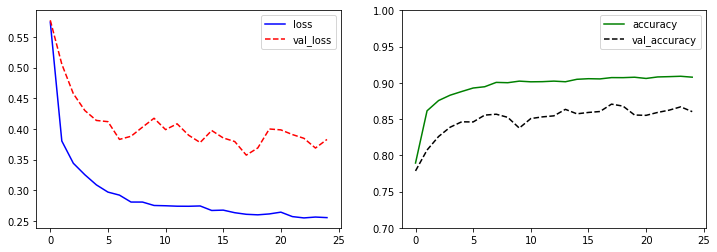

[0.2100488245487213, 0.9232000112533569]

In [14]:
#VGG 스타일 네트워크에 Image 보강 훈련 데이터를 학습시키기

model = tf.keras.Sequential([ 
                             tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=256, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)